Data obtained from cdc at this link https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm on 8/11/21. Last updated date was August 4th 2021.

Taken from CDC data overview: "Conditions contributing to the death were identified using the International Classification of Diseases, Tenth Revision (ICD-10). Deaths involving more than one condition (e.g., deaths involving both diabetes and respiratory arrest) were counted in both totals. The “Number of Mentions” column represents the number of total conditions mentioned for each age group."

Goal: to understand comorbidity trends in the US with COVID-19

In [1]:
#import librarys
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Sydney/Downloads/Conditions_Contributing_to_COVID-19_Deaths.csv')
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,08/01/2021,01/01/2020,07/31/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,450.0,469.0,NaN
1,08/01/2021,01/01/2020,07/31/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,2027.0,2081.0,NaN
2,08/01/2021,01/01/2020,07/31/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5408.0,5558.0,NaN
3,08/01/2021,01/01/2020,07/31/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,15899.0,16376.0,NaN
4,08/01/2021,01/01/2020,07/31/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,39759.0,40878.0,NaN


In [3]:
#remove unnecessary columns for data analysis
#including time periods collected (due to month/year of death already included)
#and group + ID Codes + flag + number mentions
df = df.drop(['Data As Of','Start Date','End Date', 'Group', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1)
df.head(10)

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,0-24,450.0
1,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,25-34,2027.0
2,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,35-44,5408.0
3,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,45-54,15899.0
4,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,55-64,39759.0
5,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,65-74,67983.0
6,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,75-84,77628.0
7,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,85+,70100.0
8,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,Not stated,6.0
9,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,All Ages,279260.0


In [4]:
df.tail()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
273235,2021.0,3.0,Puerto Rico,COVID-19,COVID-19,All Ages,69.0
273236,2021.0,4.0,Puerto Rico,COVID-19,COVID-19,All Ages,197.0
273237,2021.0,5.0,Puerto Rico,COVID-19,COVID-19,All Ages,183.0
273238,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,All Ages,32.0
273239,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,All Ages,17.0


In [5]:
#create new df for just United States information at highest level (all ages)
df_US = df[df['State'] == 'United States']
df_US_all = df_US[df_US['Age Group']== 'All Ages']
df_US_all.tail()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
41625,2021.0,3.0,United States,COVID-19,COVID-19,All Ages,22703.0
41626,2021.0,4.0,United States,COVID-19,COVID-19,All Ages,18375.0
41627,2021.0,5.0,United States,COVID-19,COVID-19,All Ages,14466.0
41628,2021.0,6.0,United States,COVID-19,COVID-19,All Ages,7488.0
41629,2021.0,7.0,United States,COVID-19,COVID-19,All Ages,4802.0


In [6]:
#determine data types
df_US_all.dtypes

Year               float64
Month              float64
State               object
Condition Group     object
Condition           object
Age Group           object
COVID-19 Deaths    float64
dtype: object

In [7]:
#find NaN values
df_US_all.isnull().sum()

Year               23
Month              69
State               0
Condition Group     0
Condition           0
Age Group           0
COVID-19 Deaths     0
dtype: int64

In [8]:
#which occurs more? 
print(df_US_all['Year'].value_counts())
print(df_US_all['Month'].value_counts())

2020.0    299
2021.0    184
Name: Year, dtype: int64
7.0     46
6.0     46
5.0     46
4.0     46
3.0     46
2.0     46
1.0     46
12.0    23
11.0    23
10.0    23
9.0     23
8.0     23
Name: Month, dtype: int64


In [9]:
#view size of dataframe
print(df_US_all.shape)

(506, 7)


In [10]:
#remove NA values, at the expense of losing some data and size
df_US_all = df_US_all.dropna()

In [11]:
df_US_all.head()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
37431,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,All Ages,2.0
37432,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,All Ages,8.0
37433,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,All Ages,3228.0
37434,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,All Ages,27488.0
37435,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,All Ages,14742.0


In [12]:
#how many rows present now that NaNs are dropped
print(df_US_all.shape)

(437, 7)


In [13]:
#see unique condition groups present and count occurances of each in dataset
df_US_all['Condition Group'].value_counts()

Circulatory diseases                                                         133
Respiratory diseases                                                         114
Obesity                                                                       19
All other conditions and causes (residual)                                    19
Diabetes                                                                      19
Malignant neoplasms                                                           19
COVID-19                                                                      19
Intentional and unintentional injury, poisoning, and other adverse events     19
Sepsis                                                                        19
Renal failure                                                                 19
Vascular and unspecified dementia                                             19
Alzheimer disease                                                             19
Name: Condition Group, dtype

In [14]:
#see unique conditions present and counted in the
df_US_all['Condition'].value_counts()

Other diseases of the respiratory system                                     19
Cerebrovascular diseases                                                     19
All other conditions and causes (residual)                                   19
Respiratory failure                                                          19
Obesity                                                                      19
Vascular and unspecified dementia                                            19
COVID-19                                                                     19
Respiratory arrest                                                           19
Renal failure                                                                19
Other diseases of the circulatory system                                     19
Influenza and pneumonia                                                      19
Adult respiratory distress syndrome                                          19
Ischemic heart disease                  

In [15]:
#Sum of deaths reported per condition made into dataframe
conditiondf = df_US_all['COVID-19 Deaths'].groupby(df_US_all['Condition']).sum()
conditiondf = pd.DataFrame(conditiondf)


In [16]:
#sort values by most deaths
conditiondf.sort_values('COVID-19 Deaths', ascending=False)

,COVID-19 Deaths
Condition,
COVID-19,605068.0
Influenza and pneumonia,279260.0
All other conditions and causes (residual),235024.0
Respiratory failure,228370.0
Hypertensive diseases,118560.0
Diabetes,96299.0
Cardiac arrest,73303.0
Ischemic heart disease,66093.0
Adult respiratory distress syndrome,63281.0


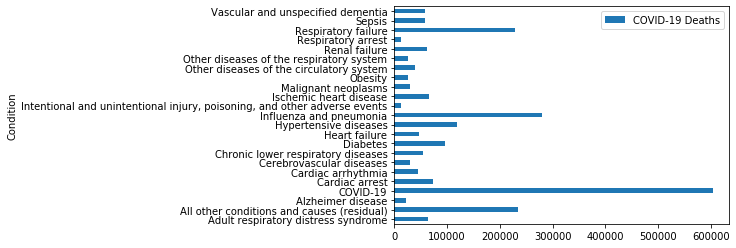

In [17]:
#make horizontal bar plot of the data
conditiondf.plot.barh()

Fromt the data, it is clear the the most prevalent underlying conditions contributing to COVID-19 deaths were influenze/pneumonia and respiratory failure. Hypertensive diseases is also a prevalent contributing factor. Due to the way conditions are reported here, COVID-19 is also shown as the total death cases collected.

In [18]:
df_US.head()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
0,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,0-24,450.0
1,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,25-34,2027.0
2,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,35-44,5408.0
3,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,45-54,15899.0
4,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,55-64,39759.0


In [19]:
df_US = df_US[df_US['Age Group']!= 'All Ages']
df_US = df_US[df_US['Age Group']!= 'Not stated']

In [20]:
df_US = df_US.dropna()
df_US

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
37260,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,0.0
37261,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,0.0
37262,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,9.0
37263,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0
37264,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,0-24,19.0
...,...,...,...,...,...,...,...
41587,2021.0,3.0,United States,COVID-19,COVID-19,85+,4863.0
41588,2021.0,4.0,United States,COVID-19,COVID-19,85+,3574.0
41589,2021.0,5.0,United States,COVID-19,COVID-19,85+,2496.0
41590,2021.0,6.0,United States,COVID-19,COVID-19,85+,1281.0


In [21]:
#view death trends per age group summed for COVID-19
deaths_per_age = df_US[df_US['Condition']== 'COVID-19']
deaths_per_age = deaths_per_age['COVID-19 Deaths'].groupby(deaths_per_age['Age Group']).sum()
deaths_per_age

Age Group
0-24       1269.0
25-34      4439.0
35-44     11345.0
45-54     31262.0
55-64     77483.0
65-74    134979.0
75-84    165436.0
85+      178844.0
Name: COVID-19 Deaths, dtype: float64

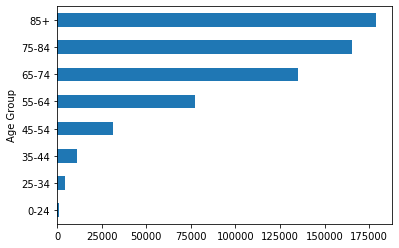

In [22]:
#deaths per age group plot
deaths_per_age.plot.barh()

In [23]:
df_US_breakdowns = df_US.groupby(['Condition','Age Group']).agg({"COVID-19 Deaths":'sum'})
df_US_breakdowns

COVID-19 Deaths
Condition                           Age Group                 
Adult respiratory distress syndrome 0-24                 176.0
                                    25-34                691.0
                                    35-44               1870.0
                                    45-54               5490.0
                                    55-64              12347.0
...                                                        ...
Vascular and unspecified dementia   45-54                 57.0
                                    55-64                751.0
                                    65-74               4913.0
                                    75-84              17134.0
                                    85+                34912.0

[184 rows x 1 columns]